> # Cloth Brand Analysis

![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSg4Q3BiUxU-UTqBt9MFJDqG7DwSo1jmFNHEqxTv6e-aWhEl-4GPS7O8e6HTojki9kJNGg&usqp=CAU)

# About

**It includes various features related to clothing items along with their corresponding prices. The dataset is intended for use in a machine learning or statistical modeling project aimed at predicting the price of clothes based on their attributes.**

In [1]:
# Import Basis
import pandas as pd 
import optuna
import numpy as np 
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns 
from colorama import Fore, Style, init;
# Import necessary libraries
from IPython.display import display, HTML
from scipy.stats import skew  # Import the skew function
# Import Plotly.go
import plotly.graph_objects as go
# import Subplots
from plotly.subplots import make_subplots
# Ignore warnings
import warnings
warnings.filterwarnings("ignore")
# Model Classifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier, VotingRegressor
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from lightgbm import LGBMClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler , StandardScaler , QuantileTransformer
import lightgbm as lgb
from sklearn.model_selection import cross_val_score
from catboost import CatBoostClassifier
from catboost import CatBoostRegressor

from sklearn.metrics import *
# Paellete
# palette = ["#00B1D2FF", "#FDDB27FF"]
palette = ["#FAD0C9FF", "#6E6E6DFF"]

color_palette = sns.color_palette(palette)
# Remove Warnings
import warnings 
warnings.filterwarnings("ignore")
# Set the option to display all columns
pd.set_option('display.max_columns', None)

# Load Overview Data

In [2]:
#Train Data 
tr_d = pd.read_csv('/kaggle/input/clothes-price-prediction/clothes_price_prediction_data.csv')

**Use Case Of this Function**

- This Function Will Help to Load and Give a Overview of Data.
- This Functions Takes Data as Inputs and Given all the Information about Data Like Head , shape , Info , Describe , Null Values and Duplicates Values etc.

In [3]:
# Function 4 Data Overview
def print_boxed_blue_heading(heading):
    gradient = [Fore.BLUE, Fore.CYAN, Fore.GREEN, Fore.YELLOW, Fore.RED, Fore.MAGENTA]
    print("\n" + "=" * (len(heading) + 4))
    words = heading.split()
    for i, word in enumerate(words):
        if i == len(words) - 1:
            print(f"| {gradient[len(word) % len(gradient)] + word + Style.RESET_ALL} |")
        else:
            print(f"| {gradient[len(word) % len(gradient)] + word + Style.RESET_ALL}", end=" ")
    print("=" * (len(heading) + 4))

def print_error(message):
    raise ValueError(message)

def D_O(train_df):
    try:

        # Display head of the training dataset nicely
        print_boxed_blue_heading("The Head Of Train Dataset is:")
        display(HTML(train_df.head(5).to_html(index=False).replace('<table border="1" class="dataframe">', '<table style="border: 2px solid blue;">').replace('<td>', '<td style="color: skyblue;">')))
        print('\n')

        # Display tail of the training dataset nicely
        print_boxed_blue_heading("The Tail Of Train Dataset is:")
        display(HTML(train_df.tail(5).to_html(index=False).replace('<table border="1" class="dataframe">', '<table style="border: 2px solid blue;">').replace('<td>', '<td style="color: skyblue;">')))
        print('\n')

        print_boxed_blue_heading("Shape Data:")
        print(f'The Shape of the Train Data is {train_df.shape} |')
        print(f'- 1.The No of Rows is {train_df.shape[0]} |')
        print(f'- 2.The No of Cols is {train_df.shape[1]}|')
        
        print('\n')
        
        print_boxed_blue_heading("Info Of Train Data:")
        train_df.info()

        # Describe both numerical and categorical data
        print_boxed_blue_heading("Numerical Summary of Train Data:")
        print(f"\n{Style.BRIGHT + Fore.LIGHTBLUE_EX}The Numerical Summary of Train Data is:{Style.RESET_ALL}")
        display(train_df.describe().style.set_caption("Train Data Summary").set_table_styles([{'selector': 'caption', 'props': [('color', 'skyblue')]}]))

        Cat_cols_train = [col for col in train_df.columns if train_df[col].dtype == 'O']
        print_boxed_blue_heading("Categorical Columns of Train Data:")
        print(f'\n{Style.BRIGHT + Fore.LIGHTBLUE_EX}The Categorical Columns of Train Data are :{Style.RESET_ALL} {Cat_cols_train}')

        N_cols_train = [col for col in train_df.columns if train_df[col].dtype == 'float']
        print_boxed_blue_heading("Numerical Columns of Train Data:")
        print(f'\n{Style.BRIGHT + Fore.LIGHTBLUE_EX}The Numerical Columns of Train Data are :{Style.RESET_ALL} {N_cols_train}\n')

        print_boxed_blue_heading("Null Values in Train Data:")
        print(f'\n{Style.BRIGHT + Fore.LIGHTBLUE_EX}The Null Values of Train Data are:{Style.RESET_ALL}\n{train_df.isnull().sum()}')

        print_boxed_blue_heading("Duplicates Check in Train Data:")
        if train_df.duplicated().any():
            print(f'\n{Style.BRIGHT + Fore.LIGHTBLUE_EX}Duplicates exist in the train dataset.{Style.RESET_ALL}')
        else:
            print(f'\n{Style.BRIGHT + Fore.LIGHTBLUE_EX}No duplicates found in the train dataset.{Style.RESET_ALL}')

        print('\n' + "=" * 100 + '\n')
        
    except Exception as e:
        print_error(f"An error occurred: {str(e)}")        

In [4]:
# Data Overview
D_O(tr_d)


| The | Head | Of | Train | Dataset | is: |


Brand,Category,Color,Size,Material,Price
New Balance,Dress,White,XS,Nylon,182
New Balance,Jeans,Black,XS,Silk,57
Under Armour,Dress,Red,M,Wool,127
Nike,Shoes,Green,M,Cotton,77
Adidas,Sweater,White,M,Nylon,113





| The | Tail | Of | Train | Dataset | is: |


Brand,Category,Color,Size,Material,Price
Puma,Jeans,Black,L,Polyester,176
Puma,Jacket,Red,XXL,Silk,110
Reebok,Sweater,Blue,XS,Denim,127
Under Armour,Sweater,Black,XXL,Denim,69
New Balance,Jacket,Yellow,XS,Wool,174





| Shape | Data: |
The Shape of the Train Data is (1000, 6) |
- 1.The No of Rows is 1000 |
- 2.The No of Cols is 6|



| Info | Of | Train | Data: |
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Brand     1000 non-null   object
 1   Category  1000 non-null   object
 2   Color     1000 non-null   object
 3   Size      1000 non-null   object
 4   Material  1000 non-null   object
 5   Price     1000 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 47.0+ KB

| Numerical | Summary | of | Train | Data: |

The Numerical Summary of Train Data is:


,Price
count,1000.000000
mean,106.289000
std,53.695444
min,10.000000
25%,59.750000
50%,108.000000
75%,150.000000
max,199.000000



| Categorical | Columns | of | Train | Data: |

The Categorical Columns of Train Data are : ['Brand', 'Category', 'Color', 'Size', 'Material']

| Numerical | Columns | of | Train | Data: |

The Numerical Columns of Train Data are : []


| Null | Values | in | Train | Data: |

The Null Values of Train Data are:
Brand       0
Category    0
Color       0
Size        0
Material    0
Price       0
dtype: int64

| Duplicates | Check | in | Train | Data: |

No duplicates found in the train dataset.




**Data Have No Null Values and Have No Duplicates**

# Exploratory Data Analysis

In [5]:
# # Function to Plot Single Pie and Bar Plot
def single_plot_distribution(column_name, dataframe):
    # Get the value counts of the specified column
    value_counts = dataframe[column_name].value_counts()

    # Set up the figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), gridspec_kw={'width_ratios': [1, 1]}) 

    # Donut pie chart
    pie_colors = palette[0:3]
    ax1.pie(value_counts, autopct='%0.001f%%', startangle=90, pctdistance=0.85, colors=pie_colors, labels=None)
    centre_circle = plt.Circle((0,0),0.70,fc='white')
    ax1.add_artist(centre_circle)
    ax1.set_title(f'Distribution of {column_name}', fontsize=16)

    # Bar chart
    bar_colors = palette[0:3]
    sns.barplot(x=value_counts.index, y=value_counts.values, ax=ax2, palette=bar_colors,) 
    ax2.set_title(f'Count of {column_name}', fontsize=16)
    ax2.set_xlabel(column_name, fontsize=14)
    ax2.set_ylabel('Count', fontsize=14)

    # Rotate x-axis labels for better readability
    ax2.tick_params(axis='x', rotation=45)

    # Show the plots
    plt.tight_layout()
    plt.show()

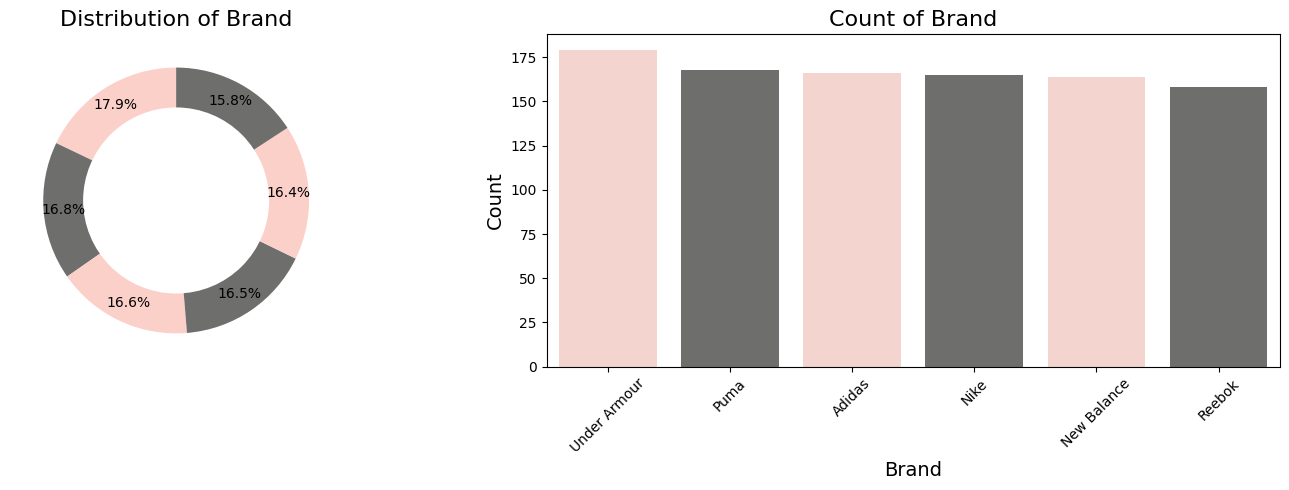

In [6]:
# Brand Ditribution
single_plot_distribution('Brand',tr_d)

**Observations :**

1. **Under Armour** stands out as the most popular brand with a score of 179, indicating it has the highest preference among the surveyed Brands.
   
2. **Puma** closely follows Under Armour with a score of 168, suggesting a strong presence and popularity in the market.

3. **Adidas**, **Nike**, and **New Balance** exhibit relatively similar scores, ranging from 164 to 166, indicating they share a similar level of popularity among consumers.

4. **Reebok** lags slightly behind the other brands with a score of 158, suggesting it might have a smaller market share or less consumer preference compared to the other listed brands.

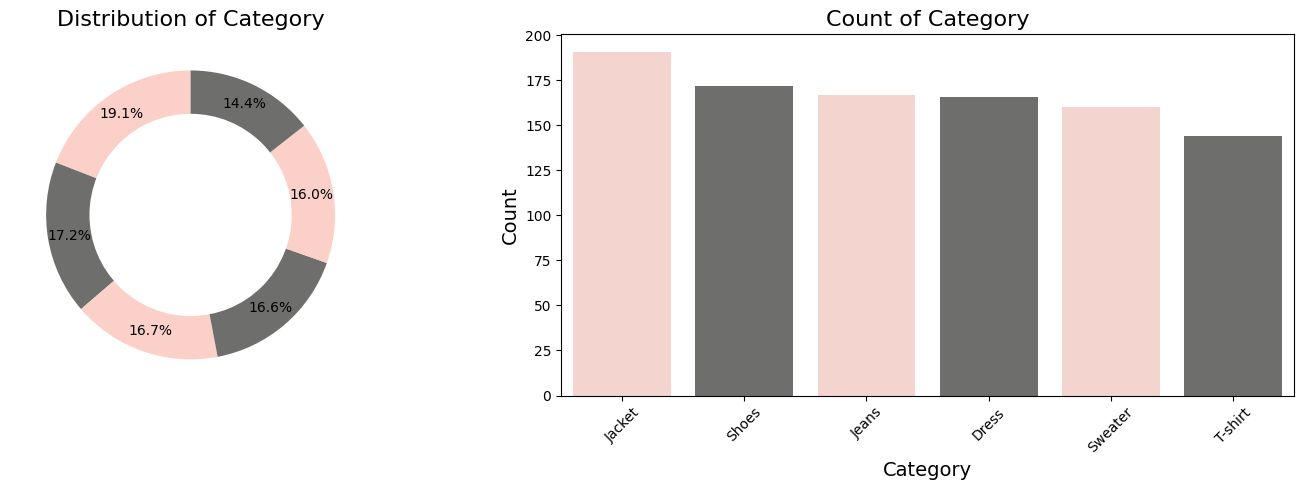

In [7]:
# Category Ditribution
single_plot_distribution('Category',tr_d)

**Observation :**

1. **Jackets** Jackets Have More Demands With Percentage Of 19.1% According to Datsets. So Its Due to Weather.

2. **Shoes** Shoes Have Slight Same Demands in The Market as Jacket have With Percentage of 17.2%.After Seeing this , Now i am Sure the Weather is Cold.

3. **Jeans** and **Dress** Jeans and Dress have Same Demand in The Market with Percentages Like 16.7% and 16.6%.

4. **Sweater** Sweater Have Less Demand then Jackets But Have Higher Demand With Percentage of 16% then Shirt in market , Due to Weather.

5. **T-Shirts** T-Shirts Have Less Demand in The Market According to Analysis With Percentage of 14.4%.in Cold Weather People Do Not Prefer The T-Shirts.

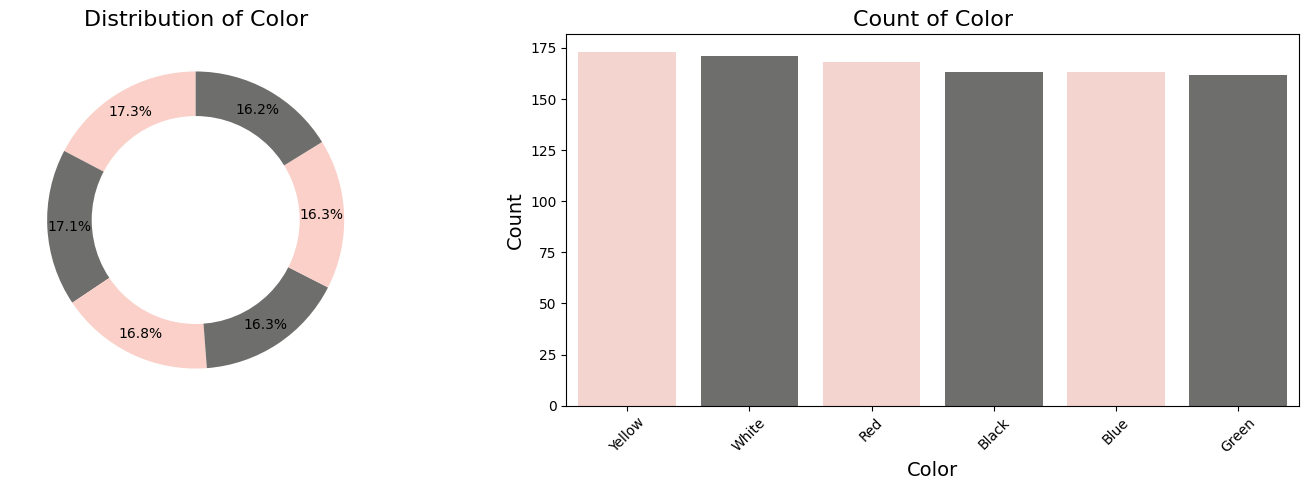

In [8]:
# Color Ditribution
single_plot_distribution('Color',tr_d)

**Observation :**

1. **Yellow Color** Yellow is Most Popular Color Among all With Percentage of 17.3% , According to The Dataset.People Loved The Yellow Color More.

2. **White Color** White Color is Also Most Popular Among People With Percentage 17.1%.

3. **Red Color** Red Color is The 3rd Papular Color Among People With Percentage 16.8%

**Question : Now Here We Can Analyse Which Colors Are Best and Popular Among People ?** So After Analyzing Data We Can Say That , Yellow , White and Red Are 3 Most Popular Color Among People.

4. **Black** , **Blue** and **Green** These 3 Colors Have Closely Same Demand among People With Percentage Values 16.3& ,16.3% and 16.2%.

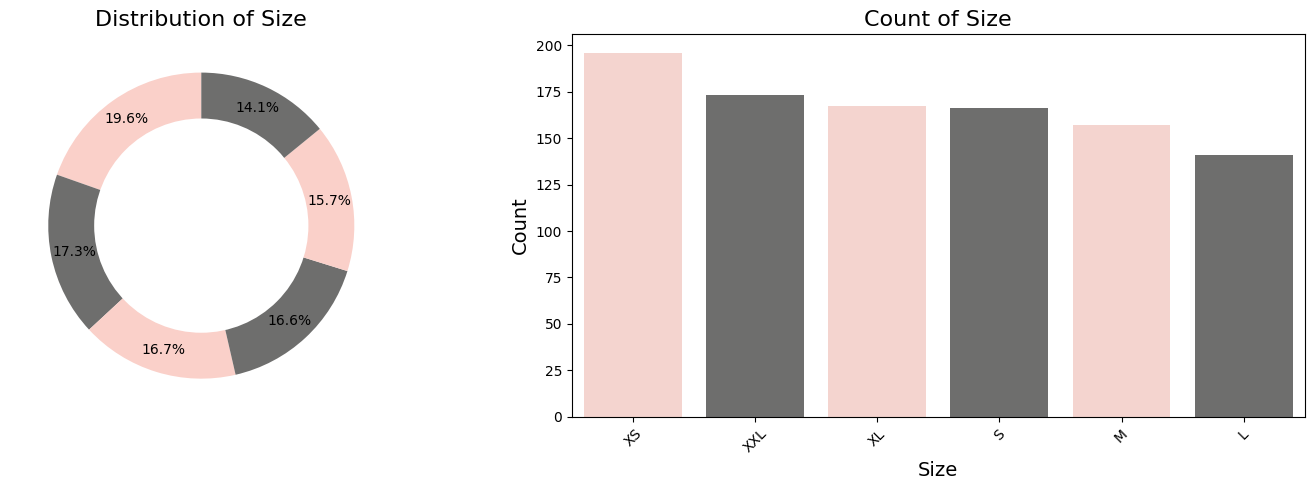

In [9]:
# Size Ditribution
single_plot_distribution('Size',tr_d)

**Observation :**

1. **XS** (Extra Small) is the most preferred size among the surveyed population, with a score of 196, indicating a high demand for smaller sizes.

2. **XXL** (Extra Extra Large) follows closely behind XS with a score of 173, suggesting a significant portion of the population prefers larger sizes.

3. **XL** (Extra Large) is the next most popular size, with a score of 167, indicating a substantial demand for larger garments but slightly less than XXL.

4. **S** (Small) and **M** (Medium) sizes show similar scores of 166 and 157, respectively, suggesting a moderate level of preference for these sizes.

5. **L** (Large) size has the lowest score among the provided sizes, with a score of 141, indicating comparatively lower demand for this size.

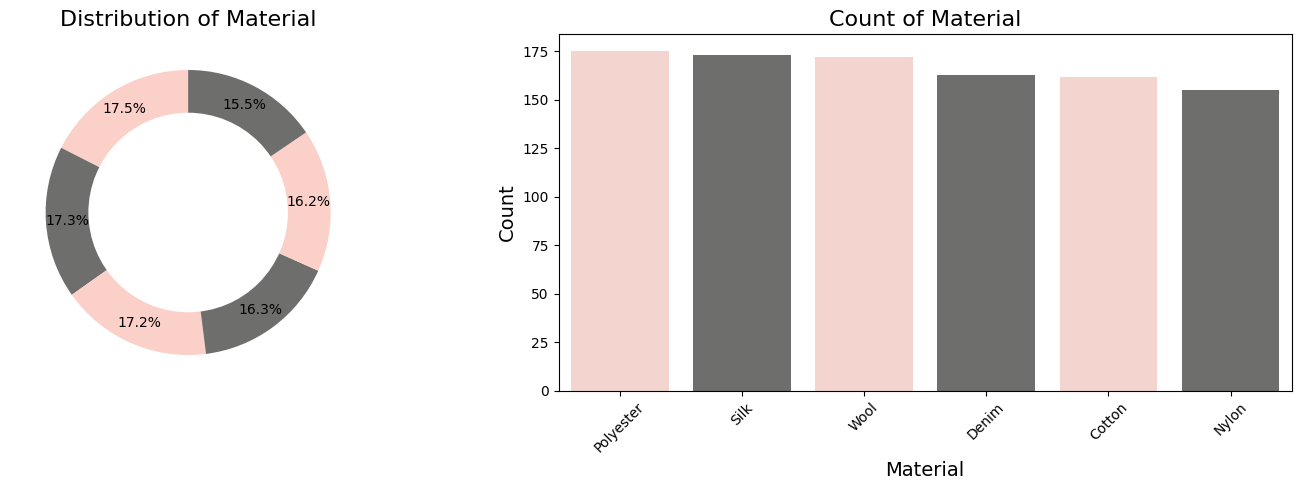

In [10]:
# Material Ditribution
single_plot_distribution('Material',tr_d)

**Observation :**

1. **Polyester** emerges as the most preferred material among the surveyed population, with a score of 175, indicating its popularity and widespread usage in various apparel items.

2. **Silk** closely follows Polyester with a score of 173, suggesting a significant preference for this luxurious and elegant fabric.

3. **Wool** ranks next with a score of 172, indicating a substantial demand for this natural and warm material, especially in colder climates or seasons.

- **Question : What are These Best Material For Clothes ?** Awnser is Very Simple Beacuse We Have Analyze The Data , Polyester , Silk and Wool.

4. **Denim** scores slightly lower at 163, suggesting a moderate level of preference for this durable and versatile fabric commonly used in jeans and casual wear.

5. **Cotton** follows closely behind Denim with a score of 162, indicating a widespread preference for this soft, breathable, and easy-to-care-for natural material.

6. **Nylon** has the lowest score among the provided materials, with a score of 155, suggesting a relatively lower level of preference compared to the other materials listed.

In [11]:
def advanced_violin_plot(x_column, y_column, dataframe):
    plt.figure(figsize=(15, 6))
    sns.violinplot(x=x_column, y=y_column, data=dataframe, palette=palette)
    plt.title(f'Violin Plot of {x_column} vs {y_column}', fontsize=16)
    plt.xlabel(x_column, fontsize=14)
    plt.ylabel(y_column, fontsize=14)
    plt.grid(True)
    plt.show()

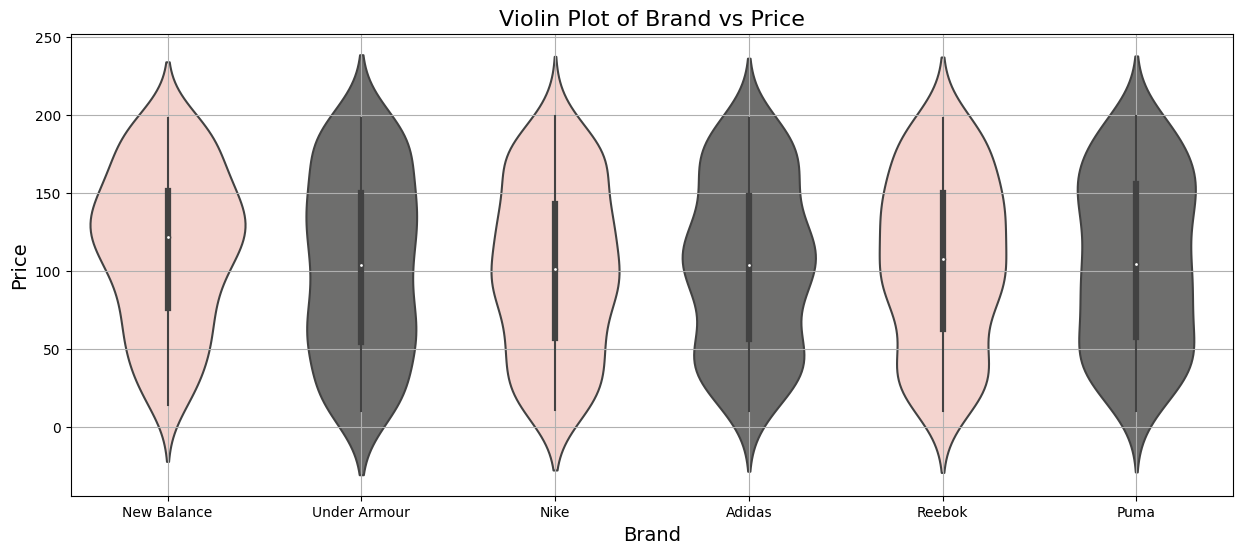

In [12]:
# Brand Vs Price , Hue by Size
advanced_violin_plot('Brand', 'Price', tr_d)

**Observation:**

| Brand         | Count | Mean      | Std       | Min | 25%  | 50%  | 75%  | Max  |
|---------------|-------|-----------|-----------|-----|------|------|------|------|
| Adidas        | 166   | <span style="color:blue">104.05</span>    | <span style="color:green">53.21</span>     | 10  | 56.25| 104.0| 148.0| 198.0|
| New Balance   | 164   | <span style="color:blue">115.46</span>    | <span style="color:green">49.87</span>     | 14  | 76.5 | 122.0| 151.25| 198.0|
| Nike          | 165   | <span style="color:blue">101.91</span>    | <span style="color:green">53.41</span>     | 11  | 57.0 | 101.0| 143.0| 199.0|
| Puma          | 168   | <span style="color:blue">106.14</span>    | <span style="color:green">53.96</span>     | 10  | 57.75| 104.5| 155.5| 199.0|
| Reebok        | 158   | <span style="color:blue">106.49</span>    | <span style="color:green">53.73</span>     | 10  | 62.75| 107.5| 150.0| 198.0|
| Under Armour  | 179   | <span style="color:blue">103.96</span>    | <span style="color:green">57.16</span>     | 10  | 54.5 | 104.0| 150.0| 198.0|


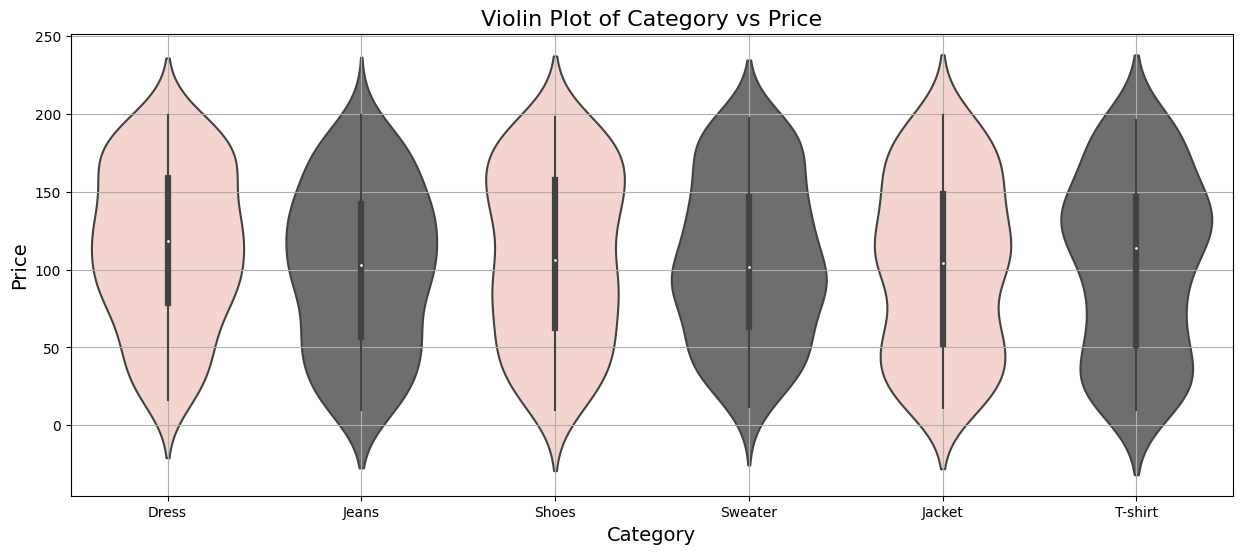

In [13]:
# Brand Vs Price , Hue by Color
advanced_violin_plot('Category', 'Price', tr_d)

**Observation:**

| Category | Count | Mean      | Std       | Min | 25%  | 50%  | 75%   | Max  |
|----------|-------|-----------|-----------|-----|------|------|-------|------|
| Dress    | 166   | <span style="color:blue">114.51</span> | <span style="color:green">51.14</span>  | 16  | 78.25| 118.0| 158.75| 199.0|
| Jacket   | 191   | <span style="color:blue">102.83</span> | <span style="color:green">55.62</span>  | 11  | 52.0 | 104.0| 148.5 | 199.0|
| Jeans    | 167   | <span style="color:blue">100.75</span> | <span style="color:green">51.95</span>  | 10  | 57.0 | 103.0| 142.0 | 199.0|
| Shoes    | 172   | <span style="color:blue">108.57</span> | <span style="color:green">54.75</span>  | 10  | 62.5 | 106.0| 157.25| 198.0|
| Sweater  | 160   | <span style="color:blue">106.78</span> | <span style="color:green">51.75</span>  | 12  | 63.0 | 101.5| 146.5 | 197.0|
| T-shirt  | 144   | <span style="color:blue">104.56</span> | <span style="color:green">56.39</span>  | 10  | 51.5 | 114.0| 146.5 | 196.0|


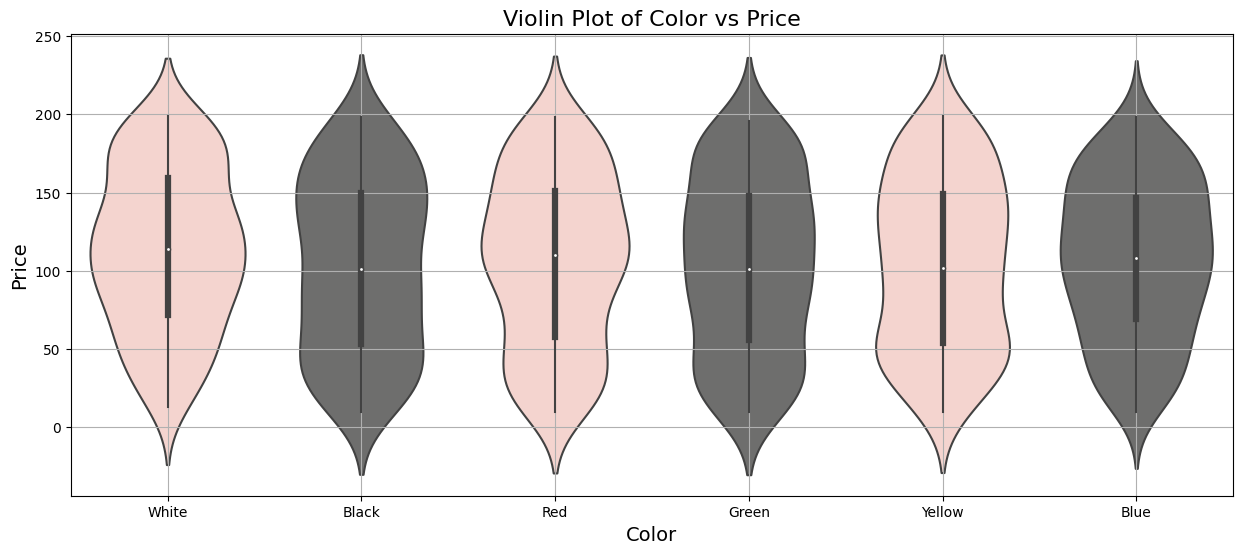

In [14]:
# Brand Vs Price , Hue by Color
advanced_violin_plot('Color', 'Price', tr_d)

**Observation:**

| Color  | Count | Mean      | Std       | Min | 25%  | 50%  | 75%   | Max  |
|--------|-------|-----------|-----------|-----|------|------|-------|------|
| Black  | 163   | <span style="color:blue">102.83</span> | <span style="color:green">55.46</span>  | 10  | 53.5 | 101.0| 150.0 | 198.0|
| Blue   | 163   | <span style="color:blue">107.06</span> | <span style="color:green">50.19</span>  | 10  | 69.5 | 108.0| 146.5 | 198.0|
| Green  | 162   | <span style="color:blue">103.52</span> | <span style="color:green">55.75</span>  | 10  | 56.0 | 101.0| 148.0 | 196.0|
| Red    | 168   | <span style="color:blue">106.14</span> | <span style="color:green">54.60</span>  | 10  | 57.75| 110.0| 151.25| 198.0|
| White  | 171   | <span style="color:blue">113.69</span> | <span style="color:green">51.49</span>  | 13  | 72.0 | 114.0| 159.5 | 199.0|
| Yellow | 173   | <span style="color:blue">104.24</span> | <span style="color:green">54.54</span>  | 10  | 54.0 | 102.0| 149.0 | 199.0|


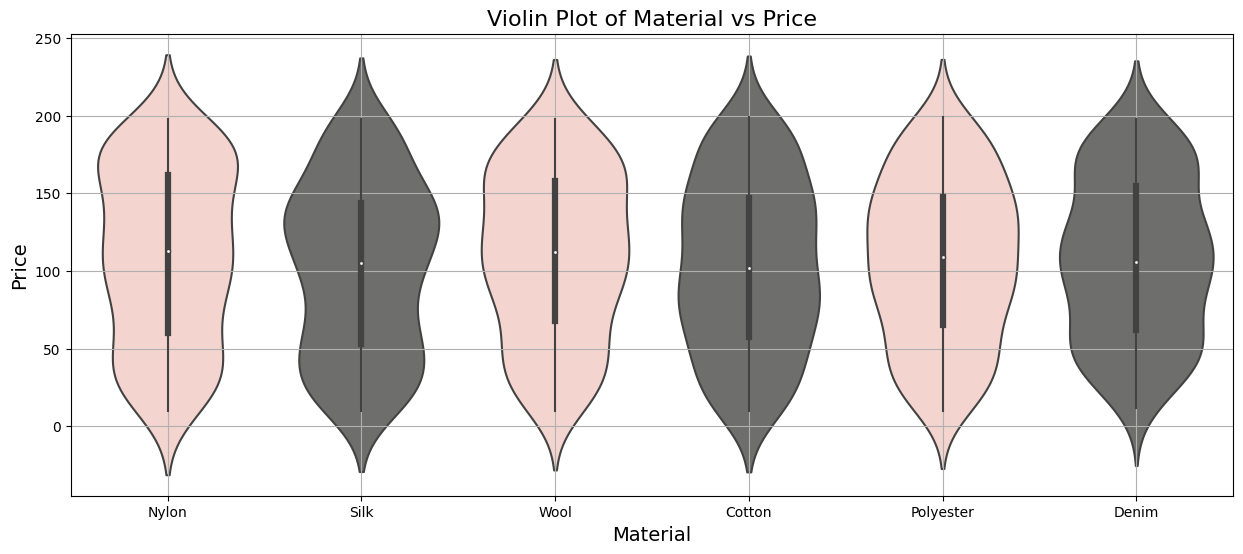

In [15]:
# Brand Vs Price , Hue by Color
advanced_violin_plot('Material', 'Price', tr_d)

**Observation:**

| Material  | Count | Mean      | Std       | Min | 25%  | 50%  | 75%   | Max  |
|-----------|-------|-----------|-----------|-----|------|------|-------|------|
| Cotton    | 162   | <span style="color:blue">103.35</span> | <span style="color:green">54.39</span>  | 10  | 57.25| 102.0| 146.75| 199.0|
| Denim     | 163   | <span style="color:blue">107.69</span> | <span style="color:green">51.53</span>  | 12  | 62.0 | 106.0| 154.5 | 198.0|
| Nylon     | 155   | <span style="color:blue">109.39</span> | <span style="color:green">56.40</span>  | 10  | 60.0 | 113.0| 162.0 | 198.0|
| Polyester | 175   | <span style="color:blue">106.43</span> | <span style="color:green">52.18</span>  | 10  | 65.5 | 109.0| 147.5 | 199.0|
| Silk      | 173   | <span style="color:blue">101.91</span> | <span style="color:green">54.79</span>  | 10  | 53.0 | 105.0| 144.0 | 198.0|
| Wool      | 172   | <span style="color:blue">109.20</span> | <span style="color:green">53.30</span>  | 10  | 67.75| 112.0| 158.0 | 198.0|


# Outlier Analysis

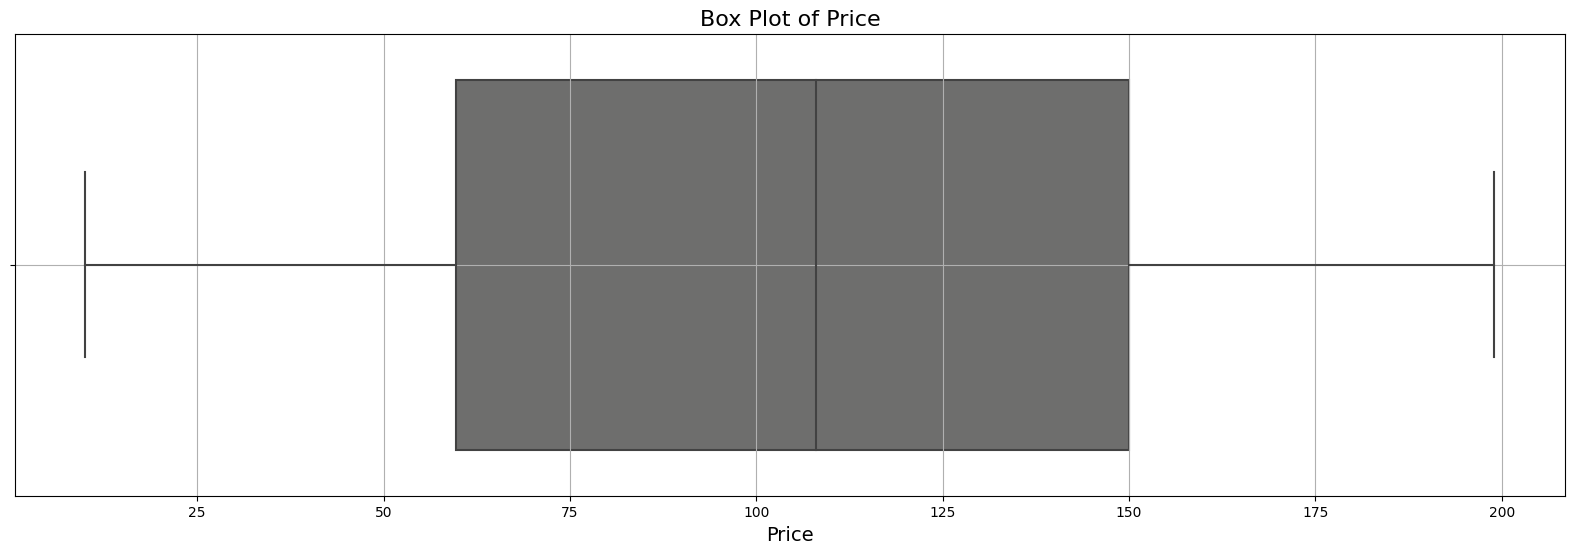

In [16]:
# Num Col
num_col = 'Price'

# Create a box plot for the selected numerical column
plt.figure(figsize=(20, 6))
sns.boxplot(x=num_col, data=tr_d, color=palette[1]) 
plt.title(f'Box Plot of {num_col}', fontsize=16)
plt.xlabel(num_col, fontsize=14)
plt.grid(True)
plt.show()

**No Outliers**

# Data || Encoding

In [17]:
# # # =================================================================================================================
# # #                        Cat - Cols
# #================================================================================================================== 
CAT_COL_E = ['Brand', 'Category', 'Color', 'Size', 'Material']

# # # =================================================================================================================
# # #                        Function to Enocde Data 
# #================================================================================================================== 
def E_D(data, columns, method='L'):
    encoded_data = data.copy()  # Make a copy of the input data
    
    if method == 'L':
        # Initialize LabelEncoder
        L_E = LabelEncoder()
        
        # Encode categorical columns using LabelEncoder
        for col in columns:
            encoded_data[col] = L_E.fit_transform(encoded_data[col])
    
    elif method == 'D':
        # Create dummy variables for categorical columns
        dummy_cols = pd.get_dummies(encoded_data[columns], prefix=columns)
        
        # Concatenate dummy variables with original data
        encoded_data = pd.concat([encoded_data, dummy_cols], axis=1)
        
        # Drop the original categorical columns
        encoded_data = encoded_data.drop(columns, axis=1)
    
    else:
        raise ValueError("Invalid method! Please choose either 'L' or 'D'.")
    
    return encoded_data

In [18]:
# # # =================================================================================================================
# # #                        Encode Train Data 
# #================================================================================================================== 
tr_d = E_D(tr_d, CAT_COL_E , 'D')
print_boxed_blue_heading('Data is Encoded Successfully')


| Data | is | Encoded | Successfully |


# Modeling || LGBM

In [19]:
# # # =================================================================================================================
# # #                         X < y 
# # #================================================================================================================== 
X_T = tr_d.drop('Price', axis=1)
y_T = np.log1p(tr_d['Price']) 

# # # =================================================================================================================
# # #                         Train < Test Split
# # #================================================================================================================== 
X_TR, X_TE, Y_TR, Y_TE = train_test_split(X_T, y_T, test_size=0.1, random_state=42)

# # # =================================================================================================================
# # #                         Shapes < 
# # #================================================================================================================== 
print_boxed_blue_heading(f"Training set shape - X: {X_TR.shape}, y: {Y_TR.shape}")
print_boxed_blue_heading(f"Testing set shape - X: {X_TE.shape}, y: {Y_TE.shape}")


| Training | set | shape | - | X: | (900, | 30), | y: | (900,) |

| Testing | set | shape | - | X: | (100, | 30), | y: | (100,) |


In [20]:
# # # =================================================================================================================
# # #                        Params <  Classifier
# # #==================================================================================================================
lgb_params = {
    'n_estimators': 899,
    'learning_rate': 0.013003893032117776,
    'max_depth': 18,
    'reg_alpha': 0.9218377389528793,
    'reg_lambda': 0.020694654173173645,
    'num_leaves': 24,
    'subsample': 0.7402011916024158,
    'colsample_bytree': 0.25484261764678784,
    'verbose' : -1
}
cat_params = {
    'n_estimators': 853,
    'learning_rate': 0.10899577626375372,
    'depth': 7,
    'colsample_bylevel': 0.7340962061535496,
    'random_strength': 6.262882561405091,
    'min_data_in_leaf': 92,
    'verbose': 0,

}
# # # =================================================================================================================
# # #                        Function < Cross Validate Classifier
# # #================================================================================================================== 
def Cross_Validate_R(reg , params, SCORING, N_CV):
    # # # =================================================================================================================
    # # #                        Train < CAT Classifier
    # # #================================================================================================================== 
    BASE = reg(**params)
    CV = cross_val_score(BASE,
                           X_T, 
                           y_T, 
                           scoring=SCORING,
                           cv=N_CV, 
                           n_jobs=-1)
    # # # =================================================================================================================
    # # #                        MSLE AUC < CAT Classifier
    # # #================================================================================================================== 
    print_boxed_blue_heading(f"The MSLE Of {reg} Regressor is: {-1*CV.mean()}")

In [21]:
# # # =================================================================================================================
# # #                        Train <  Light
# # #==================================================================================================================
Cross_Validate_R(lgb.LGBMRegressor,lgb_params,'neg_mean_squared_log_error',10)


| The | MSLE | Of | <class | 'lightgbm.sklearn.LGBMRegressor'> | Regressor | is: | 0.019494361288553537 |


In [22]:
# # # =================================================================================================================
# # #                        Train <  Cat
# # #==================================================================================================================
Cross_Validate_R(CatBoostRegressor,cat_params,'neg_mean_squared_log_error',10)


| The | MSLE | Of | <class | 'catboost.core.CatBoostRegressor'> | Regressor | is: | 0.02677478346908052 |
